![](images/microsoft.jpg)

# Microsoft Movie Studios Analysis

**Authors:** Peder Norr
***
Student name:
Peder Norr

Student pace:
Full Time

Scheduled project review date/time:
Wed, Mar 24, 2021, 9:30 AM

Instructor name: James Irving

Blog post URL:

## Overview



This proposal contains an analysis of various movie data in order to inform executive decision making regarding Microsoft's hypothetical newly launched movie studio. Specifically, it provides actionable insights with respect to what types of films the studio should focus on creating with the goal of maximizing box office performance. Initial analysis of box office performance and other movie data shows that box office earnings are related to genre, runtime, and rating. Microsoft can use this analysis to create high performing films and cement their new studio as a profitable and competitive organization in Hollywood.

***

## Business Problem

![](images/hollywood.jpg)

After witnessing the explosive growth of in house content creation from the likes of Netflix and Amazon, Microsoft has decided to enter the market and create a new movie studio. However, Microsoft is not well versed in the art of film production, and needs information on what types of films perform best at the box office. Using movie genre, movie runtime, and movie rating data, I identify patterns in box office performance to inform Microsoft's decision making as to what types of movies to produce in order to maximize profits.

***

## Data Understanding



This analysis leverages data sourced from IMDB and Box Office Mojo, two of the most prominent movie related databases. Data sourced from IMDB included information on movie title, genre, runtime and rating, and data from Box Office Mojo included information on box office gross earnings. The variables from IMDB describe important movie characteristics that can impact a movie's performance at the box office.

While the data will provide insight on movie box office performance, they do have limitations. Including more data, for example data on MPAA ratings, movie budgets, distribution location, release date, actors, directors, and more, could provide much more detailed insight into how to produce profitable movies.




In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import data files
imdb_title_basics = pd.read_csv('/Users/norrp/Documents/Flatiron/Phase_1/Project/dsc-phase-1-project/data/imdb.title.basics.csv.gz')
imdb_title_ratings = pd.read_csv('/Users/norrp/Documents/Flatiron/Phase_1/Project/dsc-phase-1-project/data/imdb.title.ratings.csv.gz')
bom_movie_gross = pd.read_csv('/Users/norrp/Documents/Flatiron/Phase_1/Project/dsc-phase-1-project/data/bom.movie_gross.csv.gz')


In [3]:
# Display dataframe information
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### IMDb Data

The IMDb datasets include data on movie title, release year, runtime, genre, and rating

In [6]:
display(imdb_title_basics.head())
imdb_title_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Box Office Mojo Data

The Box Office Mojo dataset includes data on movie title, gross domestic (United States) box office earnings, and gross foreign box office earnings.

In [7]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data Preparation



### Data Merging

First, I merged the two IMDb datasets before finally merging the Box Office Mojo dataset with the combined IMDb dataset.

In [8]:
# Creating merged IMDb dataset
imdb_data = pd.merge(imdb_title_basics, 
                     imdb_title_ratings, 
                     on='tconst', 
                     how='inner')

In [9]:
# Renaming column names to create a common key on which to merge the Box Office Dataset, and to create standard naming convention
imdb_data.rename(columns = {'primary_title': 'title', 'averagerating': 'average_rating'}, inplace = True)
imdb_data.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,average_rating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [10]:
# Merging Box Office Mojo dataset with combined IMDb dataset
movie_data = pd.merge(imdb_data, 
                      bom_movie_gross,
                      on= 'title',
                      how= 'inner')

### Data Cleaning

After creating my final dataset, I cleaned the data by addressing null values, standardizing data types, removing duplicate values, removing unnecessary columns, and splitting the genres values into discrete columns.

In [11]:
# Sort data by title
movie_data.sort_values('title', inplace = True)

# Drop duplicate movies from dataframe
movie_data.drop_duplicates(inplace=True)

# Drop unnecessary columns
movie_data.drop(['tconst', 'studio', 'original_title', 'numvotes', 'year'], axis=1, inplace=True)

# Simplify column names
movie_data.rename(columns = {'start_year': 'year'}, inplace = True)

In [12]:
movie_data.head()

,title,year,runtime_minutes,genres,average_rating,domestic_gross,foreign_gross
2022,'71,2014,99.0,"Action,Drama,Thriller",7.2,1300000.0,355000
1848,"1,000 Times Good Night",2013,117.0,"Drama,War",7.1,53900.0,NaN
280,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,72100000.0,38100000
1142,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,203000.0,NaN
2288,1001 Grams,2014,93.0,Drama,6.3,11000.0,NaN


In [13]:
# Check for null values
movie_data[movie_data.isna().any(axis=1)]

,title,year,runtime_minutes,genres,average_rating,domestic_gross,foreign_gross
1848,"1,000 Times Good Night",2013,117.0,"Drama,War",7.1,53900.0,NaN
1142,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,203000.0,NaN
2288,1001 Grams,2014,93.0,Drama,6.3,11000.0,NaN
1569,13 Sins,2014,93.0,"Horror,Thriller",6.3,13800.0,NaN
642,14 Blades,2010,114.0,"Action,History,Thriller",6.4,NaN,3800000
...,...,...,...,...,...,...,...
1990,Youth,2013,107.0,Drama,6.1,2700000.0,NaN
881,Z for Zachariah,2015,98.0,"Drama,Sci-Fi,Thriller",6.0,121000.0,NaN
2366,Zero Motivation,2014,97.0,"Comedy,Drama",7.3,116000.0,NaN
805,Zindagi Na Milegi Dobara,2011,155.0,"Comedy,Drama",8.1,3100000.0,NaN


In [16]:
movie_data.isna().sum()

title                 0
year                  0
runtime_minutes      47
genres                7
average_rating        0
domestic_gross       22
foreign_gross      1195
dtype: int64

In [17]:
# Create new category for missing genre values
movie_data['genres'] = movie_data['genres'].fillna('Unknown')

In [18]:
# Replace null runtime values with median runtime (in order to prevent outlier bias)
movie_data['runtime_minutes'].fillna(movie_data['runtime_minutes'].median(), inplace=True)

In [19]:
# Set foreign gross value data type to float
movie_data['foreign_gross'] = movie_data['foreign_gross'].str.replace(',','')
movie_data['foreign_gross'] = movie_data['foreign_gross'].astype('float64')

In [21]:
# Replaced null values in domestic and foreign gross with 0, as it is
# possible that movie was simply not released domestically or overseas and vice versa
movie_data['domestic_gross'].fillna(0, inplace=True)
movie_data['foreign_gross'].fillna(0, inplace=True)

In [22]:
display(movie_data.info())
movie_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 2022 to 2165
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   year             3027 non-null   int64  
 2   runtime_minutes  3027 non-null   float64
 3   genres           3027 non-null   object 
 4   average_rating   3027 non-null   float64
 5   domestic_gross   3027 non-null   float64
 6   foreign_gross    3027 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 189.2+ KB


None

,title,year,runtime_minutes,genres,average_rating,domestic_gross,foreign_gross
2022,'71,2014,99.0,"Action,Drama,Thriller",7.2,1300000.0,355000.0
1848,"1,000 Times Good Night",2013,117.0,"Drama,War",7.1,53900.0,0.0
280,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,72100000.0,38100000.0
1142,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,203000.0,0.0
2288,1001 Grams,2014,93.0,Drama,6.3,11000.0,0.0


In [23]:
movie_data.isna().sum()

title              0
year               0
runtime_minutes    0
genres             0
average_rating     0
domestic_gross     0
foreign_gross      0
dtype: int64

### Feature Engineering

I create a `total_gross` feature to analyze the total gross earnings of a movie globally (domestic and foreign), as well as split the `genre` column into discrete columns

In [24]:
# Create total_gross feature
movie_data['total_gross'] = (movie_data['domestic_gross'] + movie_data['foreign_gross'])

# Separate genre column values into discrete columns
movie_data[['genre_1', 'genre_2', 'genre_3']] = movie_data['genres'].str.split(',', n=-1, expand=True)

movie_data.head()

,title,year,runtime_minutes,genres,average_rating,domestic_gross,foreign_gross,total_gross,genre_1,genre_2,genre_3
2022,'71,2014,99.0,"Action,Drama,Thriller",7.2,1300000.0,355000.0,1655000.0,Action,Drama,Thriller
1848,"1,000 Times Good Night",2013,117.0,"Drama,War",7.1,53900.0,0.0,53900.0,Drama,War,None
280,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,72100000.0,38100000.0,110200000.0,Drama,Horror,Mystery
1142,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,203000.0,0.0,203000.0,Comedy,Drama,Romance
2288,1001 Grams,2014,93.0,Drama,6.3,11000.0,0.0,11000.0,Drama,None,None


In [25]:
# Save cleaned dataset as CSV file
movie_data.to_csv('data/cleaned_movie_data.csv')

## Analysis
In my analysis, I identify and examine the relationships between total gross box office earnings and movie genre, rating, and runtime.



### Genre

The genres action, adventure, animation, comedy, fantasy, and sci-fi perform best at the box office.

C:\Users\norrp\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\norrp\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\norrp\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\norrp\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\norrp\anaconda3\envs\learn-env\lib\

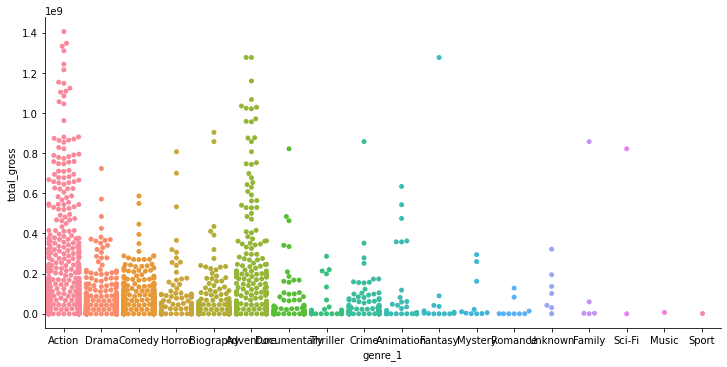

In [41]:
sns.catplot(x='genre_1', y='total_gross', data=movie_data, aspect=2, kind='swarm')
#genre_axes[0].set_xlabel('Genre')
#genre_axes[0].set_ylabel('Total Gross (in dollars)')
#genre_axes[0].set_title('Total Gross of Movie by Genre 1')
#genre_axes[0].yaxis.set_major_formatter('${x:1.2f}')
#genre_axes[0].tick_params(axis='x', rotation=90)

<ipython-input-26-3eb6c897beb7>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  genre_axes[1].set_yticks([], [])
<ipython-input-26-3eb6c897beb7>:25: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  genre_axes[2].set_yticks([], [])


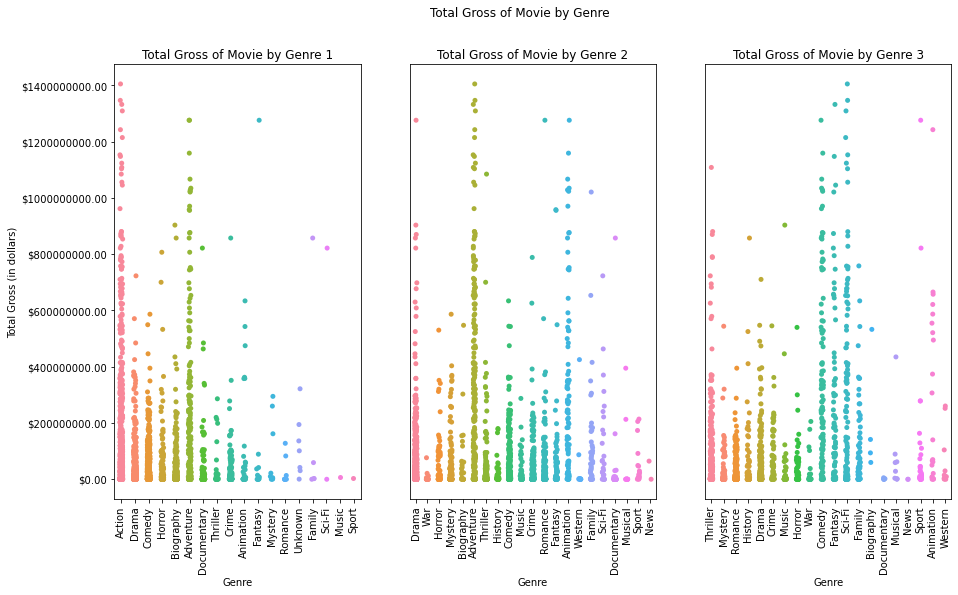

In [26]:
# Create plot
genre_fig, genre_axes = plt.subplots(nrows=1, ncols=3, figsize=(15,8))

sns.stripplot(ax=genre_axes[0], x='genre_1', y='total_gross', data=movie_data)
genre_axes[0].set_xlabel('Genre')
genre_axes[0].set_ylabel('Total Gross (in dollars)')
genre_axes[0].set_title('Total Gross of Movie by Genre 1')
genre_axes[0].yaxis.set_major_formatter('${x:1.2f}')
genre_axes[0].tick_params(axis='x', rotation=90)

sns.stripplot(ax=genre_axes[1], x='genre_2', y='total_gross', data=movie_data)
genre_axes[1].set_xlabel('Genre')
genre_axes[1].set_ylabel('')
genre_axes[1].set_title('Total Gross of Movie by Genre 2')
genre_axes[1].yaxis.set_major_formatter('${x:1.2f}')
genre_axes[1].tick_params(axis='x', rotation=90)
genre_axes[1].set_yticks([], [])

sns.stripplot(ax=genre_axes[2], x='genre_3', y='total_gross', data=movie_data)
genre_axes[2].set_xlabel('Genre')
genre_axes[2].set_ylabel('')
genre_axes[2].set_title('Total Gross of Movie by Genre 3')
genre_axes[2].yaxis.set_major_formatter('${x:1.2f}')
genre_axes[2].tick_params(axis='x', rotation=90)
genre_axes[2].set_yticks([], [])
    
genre_fig.suptitle('Total Gross of Movie by Genre')

plt.savefig('/Users/norrp/Documents/Flatiron/Phase_1/Project/dsc-phase-1-project/images/gross_by_genre.png', dpi=150)

plt.show()

### Runtime
There is a positive correlation between runtime and total box office gross, however there is are diminishing marginal returns once a runtime passes a threshold.

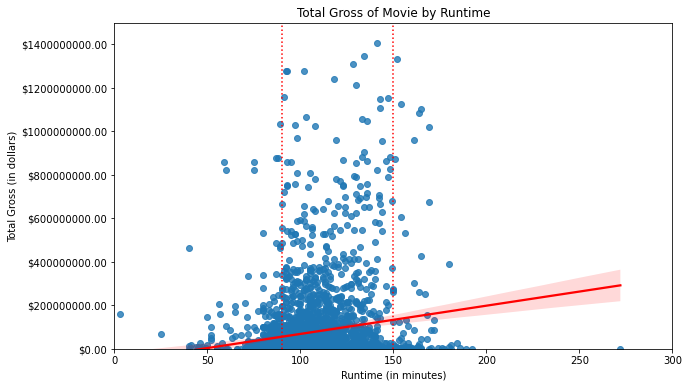

In [32]:
# Create plot
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(ax=ax, x='runtime_minutes', y='total_gross', data=movie_data, line_kws={'color': 'red'})
ax.set_xlabel('Runtime (in minutes)')
ax.set_ylabel('Total Gross (in dollars)')
ax.set_title('Total Gross of Movie by Runtime')
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set(xlim=(0,300))
ax.set(ylim=(0,1500000000))
ax.axvline(90, color='red', ls=':')
ax.axvline(150, ls=':', color ='red')

plt.savefig('/Users/norrp/Documents/Flatiron/Phase_1/Project/dsc-phase-1-project/images/gross_by_runtime.png', dpi=150)

plt.show()

### Ratings

There is a positive correlation between rating and total box office gross.

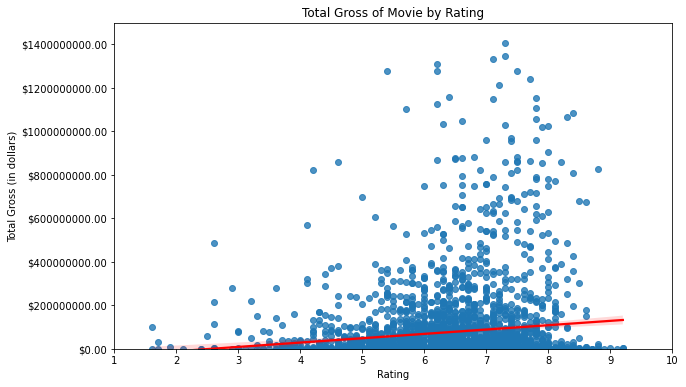

In [33]:
# Create plot
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(ax=ax, 
            x='average_rating', 
            y='total_gross', 
            data=movie_data, 
            line_kws={'color': 'red'})
ax.set_xlabel('Rating')
ax.set_ylabel('Total Gross (in dollars)')
ax.set_title('Total Gross of Movie by Rating')
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set(xlim=(1,10))
ax.set(ylim=(0,1500000000))

plt.savefig('/Users/norrp/Documents/Flatiron/Phase_1/Project/dsc-phase-1-project/images/gross_by_rating.png', dpi=150)

plt.show()

## Conclusions

This analysis provides three recommendations for Microsoft's new movie studio regarding how to decide what type of movies to produce:

*  __Make movies of the highest grossing genres__. The movies that could be categorized in the action, adventure, animation, comedy, fantasy, and sci-fi genres tended to have higher box office earnings. Microsoft should focus on these genres the most.
* __Runtime should not be overlooked__. In general, movies that had longer runtimes also had higher box office earnings. However, once movies surpassed a runtime threshold, box office performance was hampered. Microsoft should focus on making movies within that sweet spot between 90 and 150 minutes.
* __Ratings are everything__. The data showed that the movies with the higher ratings tended to have higher box office earnings. Microsoft should prioritize making quality, well reviewed movies that can score at least a 6 on IMDb's scale.

### Next Steps
Sourcing more data and conducting further analysis could provide Microsoft more insight on what type of movies to create.
* Including more data, for example data on MPAA ratings, movie budgets, distribution location, release date, actors, directors, and more, could provide much more detailed insight into how to make profitable movies.

***